# 🚢 Task 2 – Titanic Survival Analysis (Enhanced)

In [1]:
# 1. Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [2]:
# 2. Load dataset
df = pd.read_csv("gender_submission.csv")

In [3]:
# 3. Inspect data
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [5]:
df.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [6]:
# 4. Check for missing values
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [7]:
# 5. Analyze survival distribution
survival_counts = df['Survived'].value_counts()
survival_percentage = df['Survived'].value_counts(normalize=True) * 100

print("✅ Survival Rate: {:.2f}%".format(df['Survived'].mean() * 100))

✅ Survival Rate: 36.36%


C:\Users\riyan\AppData\Local\Temp\ipykernel_16404\1317254756.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


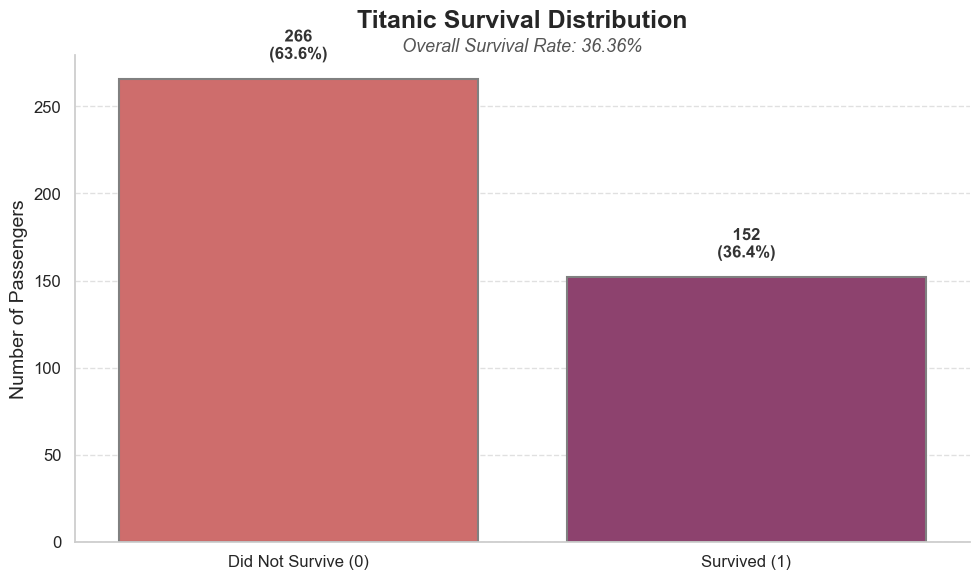

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects

# Ensure Seaborn styling
sns.set_theme(style="whitegrid", font_scale=1.1)

# Data for plotting
labels = ['Did Not Survive (0)', 'Survived (1)']
counts = survival_counts.values
percents = survival_percentage.values

# 1. Create figure
plt.figure(figsize=(10, 6))

# 2. Use a vibrant palette and draw bars with edge color
palette = sns.color_palette("flare", n_colors=2)
bars = sns.barplot(
    x=labels,
    y=counts,
    palette=palette,
    edgecolor="gray",
    linewidth=1.5
)

# 3. Add dual annotations (count & %)
for i, (cnt, pct) in enumerate(zip(counts, percents)):
    txt = f"{cnt:,}\n({pct:.1f}%)"
    # draw text with a slight white stroke for better contrast
    txt_obj = bars.annotate(
        txt,
        xy=(i, cnt),
        xytext=(0, 12),
        textcoords="offset points",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="#333"
    )
    txt_obj.set_path_effects([
        path_effects.Stroke(linewidth=3, foreground="white"),
        path_effects.Normal()
    ])

# 4. Clean up spines & grid
sns.despine(left=False, right=True, bottom=False, top=True)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# 5. Titles and labels
plt.title("Titanic Survival Distribution", fontsize=18, weight="bold", pad=20)
plt.xlabel("")  # no xlabel
plt.ylabel("Number of Passengers", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# 6. Annotate overall rate
overall_rate = df['Survived'].mean() * 100
plt.text(
    0.5, max(counts) * 1.05,
    f"Overall Survival Rate: {overall_rate:.2f}%",
    ha="center", va="bottom",
    fontsize=13, fontstyle="italic", color="#555"
)

plt.tight_layout()
plt.show()
